In [1]:
from google.colab import files
import pandas as pd

df = files.upload()
data = pd.read_csv('Financial_Sentiment.csv')

Saving Financial_Sentiment.csv to Financial_Sentiment.csv


**EDA (Exploratory Data Analysis)**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [3]:
data.head(50)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [4]:
data.shape

(5842, 2)

In [5]:
data.isnull().sum()

,0
Sentence,0
Sentiment,0


In [6]:
data[data.duplicated()]

,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


**Data Visualization**

Jumlah Value Pada Kolom Sentiment: Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


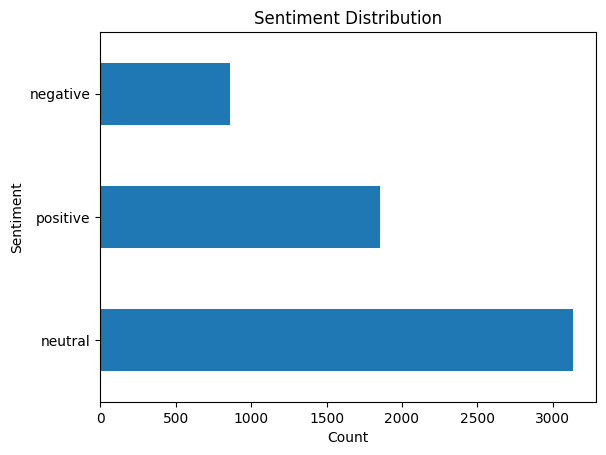

In [7]:
import matplotlib.pyplot as plt

Sentiment = data['Sentiment'].value_counts()
print("Jumlah Value Pada Kolom Sentiment:", Sentiment)

plt.figure()
Sentiment.plot(kind='barh')
plt.title("Sentiment Distribution")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.show()

count    5842.000000
mean       21.004793
std        10.306465
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: Text_Length, dtype: float64


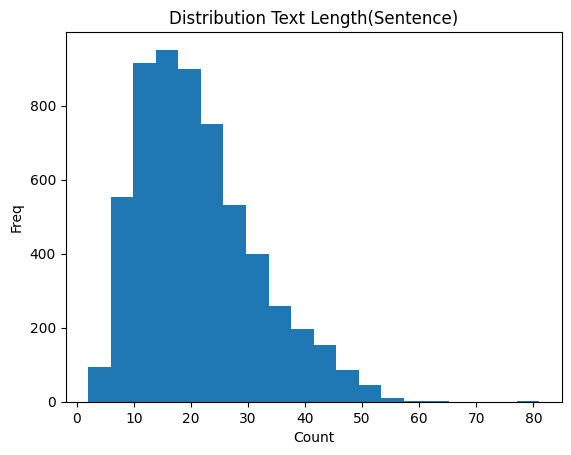

In [8]:
data["Text_Length"] = data["Sentence"].astype(str).apply(
    lambda x : len(x.split())
)

print(data['Text_Length'].describe())

plt.figure()
plt.hist(data["Text_Length"], bins = 20)
plt.title("Distribution Text Length(Sentence)")
plt.xlabel("Count")
plt.ylabel("Freq")
plt.show()

<Figure size 640x480 with 0 Axes>

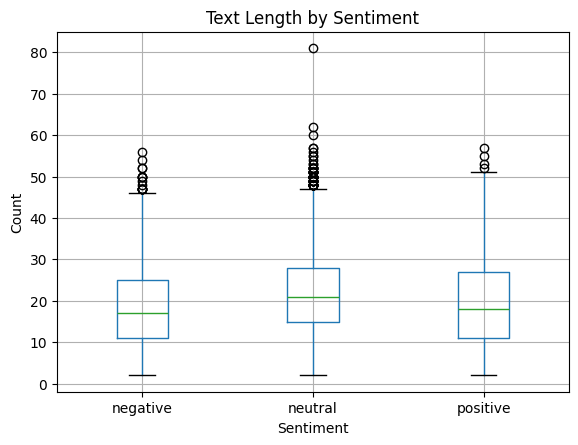

In [9]:
plt.figure()
data.boxplot(column= "Text_Length", by = "Sentiment")
plt.title("Text Length by Sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Data Cleaning**

In [10]:
import re

def Normalization_Url(text):
  text = re.sub(r"https?\s*:\s*/\s*/", "https://", text)
  text = re.sub(r"www\s+(\w+)\s*\.\s*com",r"www.\1.com",text)
  text = re.sub(r"\s*\#\s*", "#", text)
  text = re.sub(r"\s*\$\s*", "$", text)
  return text

def cleaning_text(text):
  text = text.lower().strip()
  text = Normalization_Url(text)
  text = re.sub(r"https?\S+|www\S+", "", text)
  text = re.sub(r"@\s*\w+", "", text)
  text = re.sub(r"[()]", "", text)

  split = text.split()
  split = [w for w in split if len(w) >= 1]

  return " ".join(split)


In [11]:
data['Clean_Text'] = data['Sentence'].apply(cleaning_text)

In [12]:
label = {
    "positive": 0,
    "negative": 1,
    "neutral": 2
}

data["Label"] = data["Sentiment"].map(label)


In [13]:
data[['Clean_Text','Label']].head(50)

,Clean_Text,Label
0,the geosolutions technology will leverage bene...,0
1,"$esi on lows, down$1.50 to$2.50 bk a real poss...",1
2,"for the last quarter of 2010 , componenta 's n...",0
3,according to the finnish-russian chamber of co...,2
4,the swedish buyout firm has sold its remaining...,2
5,$spy wouldn't be surprised to see a green close,0
6,shell's$70 billion bg deal meets shareholder s...,1
7,ssh communications security corp stock exchang...,1
8,kone 's net sales rose by some 14 % year-on-ye...,0
9,the stockmann department store will have a tot...,2


**Modelling**

In [14]:
from sklearn.model_selection import train_test_split

X = data.Clean_Text
y = data.Label

TrainX,ValX,TrainY,ValY = train_test_split(X,y,test_size = 0.2,
                                            random_state = 42,
                                            stratify = y)

len(TrainX), len(ValX)

(4673, 1169)

In [15]:
!pip install transformers torch --quiet

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as raihan

usnModel = "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained(usnModel)
model = AutoModelForSequenceClassification.from_pretrained(usnModel)

device = torch.device("cuda"
                      if torch.cuda.is_available()
                      else "cpu")
model.to(device)


def prediksi_finbert(text):
  input = tokenizer(
      text.tolist(),
      padding = True,
      truncation = True,
      max_length = 128,
      return_tensors = "pt"
  )

  input = {k: v.to(device) for k, v in input.items()}

  with torch.no_grad():
    output = model(**input)

  probs = raihan.softmax(output.logits, dim = 1)
  preds = torch.argmax(probs, dim = 1)

  return preds.cpu().numpy()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = prediksi_finbert(ValX)

print("Accuracy:", accuracy_score(ValY, y_pred))
print(classification_report(ValY, y_pred))

Accuracy: 0.7639007698887939
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       371
           1       0.51      0.81      0.63       172
           2       0.82      0.75      0.78       626

    accuracy                           0.76      1169
   macro avg       0.74      0.78      0.74      1169
weighted avg       0.79      0.76      0.77      1169



**Model Inference**

In [ ]:
save_path = "./finbert_model"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

load_path = "./finbert_model"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(load_path)
model = AutoModelForSequenceClassification.from_pretrained(load_path)

model.to(device)
model.eval()

In [ ]:
import torch
import torch.nn.functional as raihan

id2label = {
    0: "positive",
    1: "negative",
    2: "neutral"
}

def predict(text):
    inputs = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    probs = raihan.softmax(outputs.logits, dim=1)
    pred_id = torch.argmax(probs, dim=1).item()

    return {
        "label": id2label[pred_id],
        "confidence": probs[0][pred_id].item()
    }

In [ ]:
text = "The company reported strong quarterly earnings"

result = predict(text)

print(result)

{'label': 'positive', 'confidence': 0.9515174031257629}


In [ ]:
text = "$TSLA plunges 8% after weak delivery numbers; investors fear margin compression"

result = predict(text)

print(result)

{'label': 'negative', 'confidence': 0.9717729091644287}


In [ ]:
text = "$BBCA reported Q4 results in line with guidance; dividend announcement expected in March."

result = predict(text)

print(result)

{'label': 'neutral', 'confidence': 0.7382011413574219}


the model reached 76% accuracy mainly because the dataset is small and imbalanced.while finbert is strong for financial text, the limited and uneven data makes it harder to predict all classes equally well